In [8]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv('/content/bank_transactions_data.csv')

In [4]:
# Displaying the first five rows of the dataset
print("First five rows of the dataset:")
display(df.head())

# Getting basic information about the dataset
print("\nDataset information:")
print(df.info())

# Statistical summary of numerical columns
print("\nStatistical summary of numerical columns:")
display(df.describe())

# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Checking for duplicate entries
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

First five rows of the dataset:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Ac

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000



Missing values in each column:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

Number of duplicate rows:
0


In [5]:
df.shape

(2512, 16)

In [6]:
df.nunique()

,0
TransactionID,2512
AccountID,495
TransactionAmount,2455
TransactionDate,2512
TransactionType,2
Location,43
DeviceID,681
IP Address,592
MerchantID,100
Channel,3


<Axes: xlabel='TransactionAmount', ylabel='Count'>

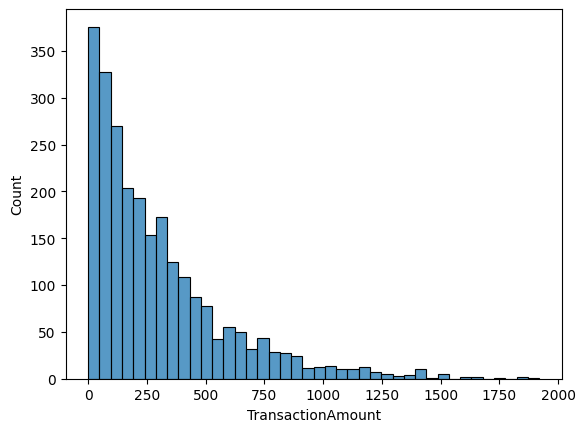

In [ ]:
sns.histplot(df['TransactionAmount'])

## Data Visualization

<ipython-input-7-023bab35681a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=all_locations.index, x=all_locations.values, palette='viridis')


Text(0, 0.5, 'Location')

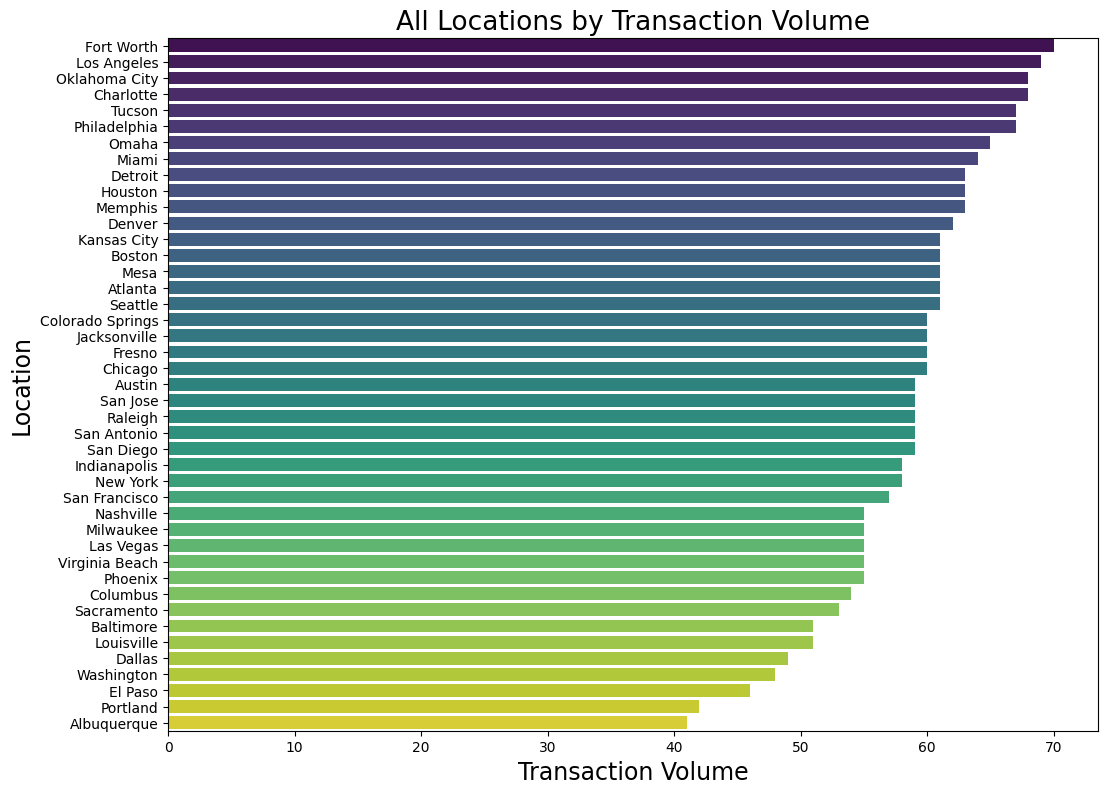

In [7]:
all_locations = df['Location'].value_counts().head(43)

plt.figure(figsize=(12,9))
sns.barplot(y=all_locations.index, x=all_locations.values, palette='viridis')
plt.title('All Locations by Transaction Volume', fontsize=19)
plt.xlabel('Transaction Volume', fontsize=17)
plt.ylabel('Location', fontsize=17)

In [ ]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_features

['TransactionID',
 'AccountID',
 'TransactionDate',
 'TransactionType',
 'Location',
 'DeviceID',
 'IP Address',
 'MerchantID',
 'Channel',
 'CustomerOccupation',
 'PreviousTransactionDate']

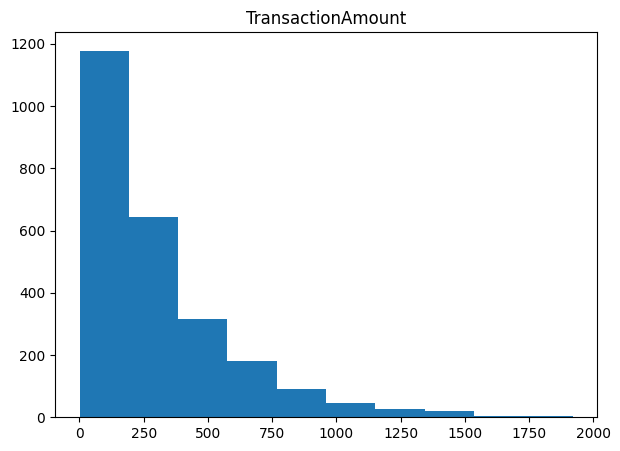

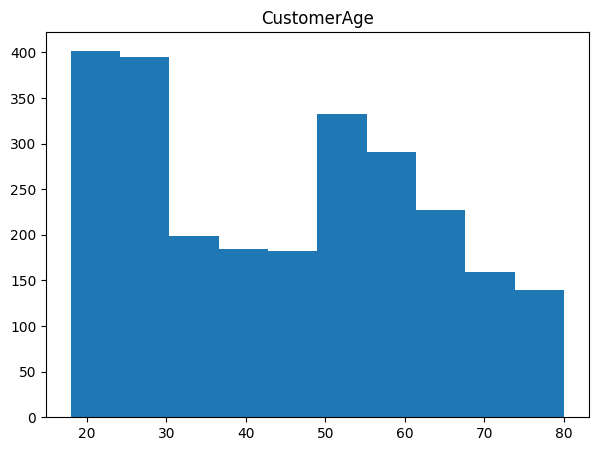

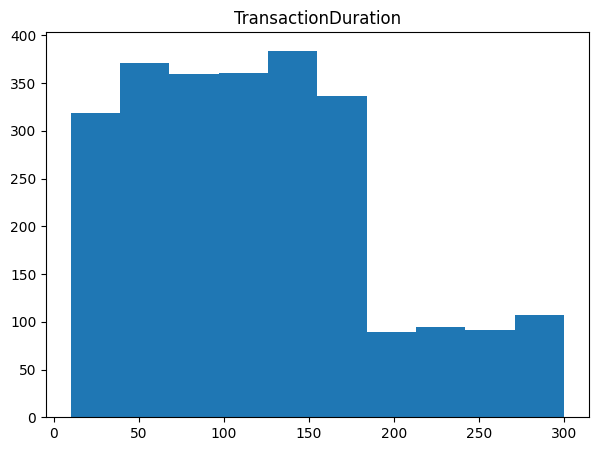

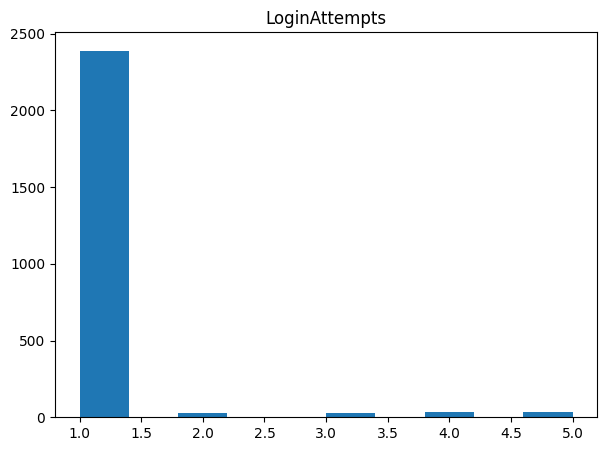

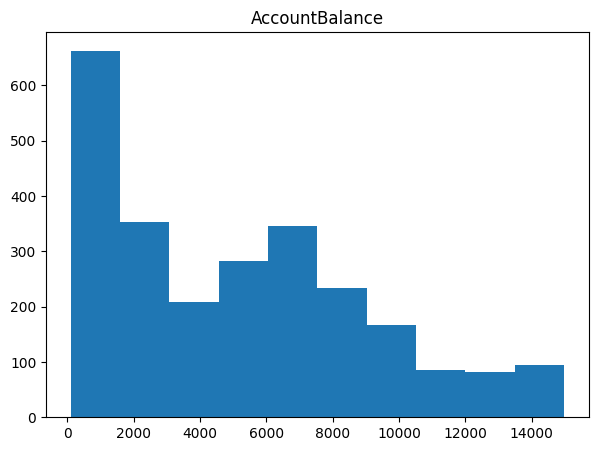

In [ ]:
for col in df.columns:
  if df[col].dtypes != 'O':
    plt.figure(figsize=(7,5))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

<Axes: xlabel='TransactionAmount', ylabel='Count'>

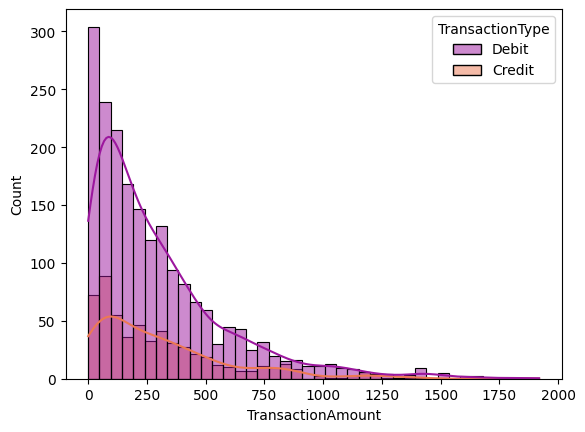

In [ ]:
sns.histplot(data=df, x="TransactionAmount", kde=True, hue='TransactionType', palette='plasma')

Text(0.5, 1.0, 'Histplot of Transaction Amount')

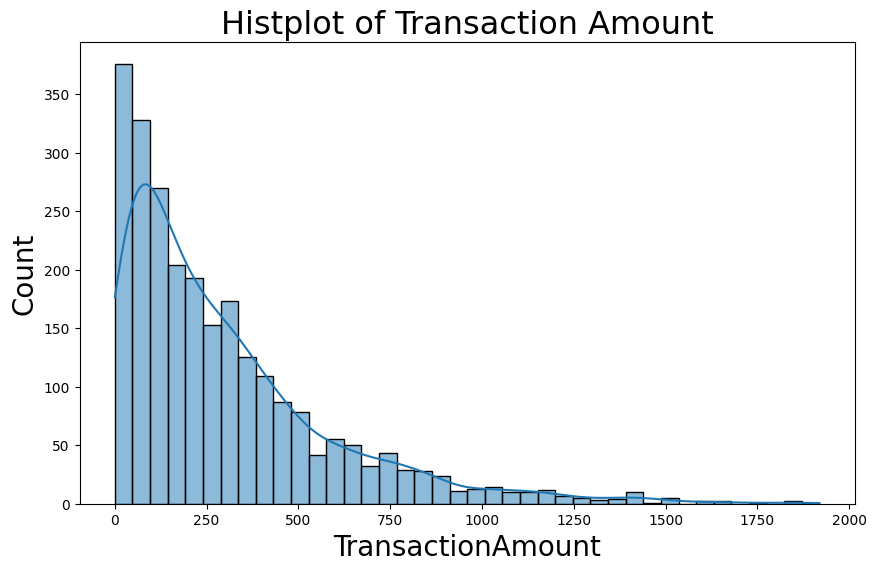

In [ ]:
plt.figure(figsize=(10,6))

sns.histplot(df['TransactionAmount'], kde=True)
plt.xlabel('TransactionAmount', fontsize= 20)
plt.ylabel('Count', fontsize= 20)
plt.title("Histplot of Transaction Amount", fontsize=23)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 [Text(0, 0, 'San Diego'),
  Text(1, 0, 'Houston'),
  Text(2, 0, 'Mesa'),
  Text(3, 0, 'Raleigh'),
  Text(4, 0, 'Atlanta'),
  Text(5, 0, 'Oklahoma City'),
  Text(6, 0, 'Seattle'),
  Text(7, 0, 'Indianapolis'),
  Text(8, 0, 'Detroit'),
  Text(9, 0, 'Nashville'),
  Text(10, 0, 'Albuquerque'),
  Text(11, 0, 'Memphis'),
  Text(12, 0, 'Louisville'),
  Text(13, 0, 'Denver'),
  Text(14, 0, 'Austin'),
  Text(15, 0, 'Columbus'),
  Text(16, 0, 'Los Angeles'),
  Text(17, 0, 'Las Vegas'),
  Text(18, 0, 'Fort Worth'),
  Text(19, 0, 'Miami'),
  Text(20, 0, 'Milwaukee'),
  Text(21, 0, 'Baltimore'),
  Text(22, 0, 'New York'),
  Text(23, 0, 'San Francisco'),
  Text(24, 0, 'San Jose'),
  Text(25, 0, 'San Antonio'),
  Text(26, 0, 'Philadelphia'),
  Text(27, 0,

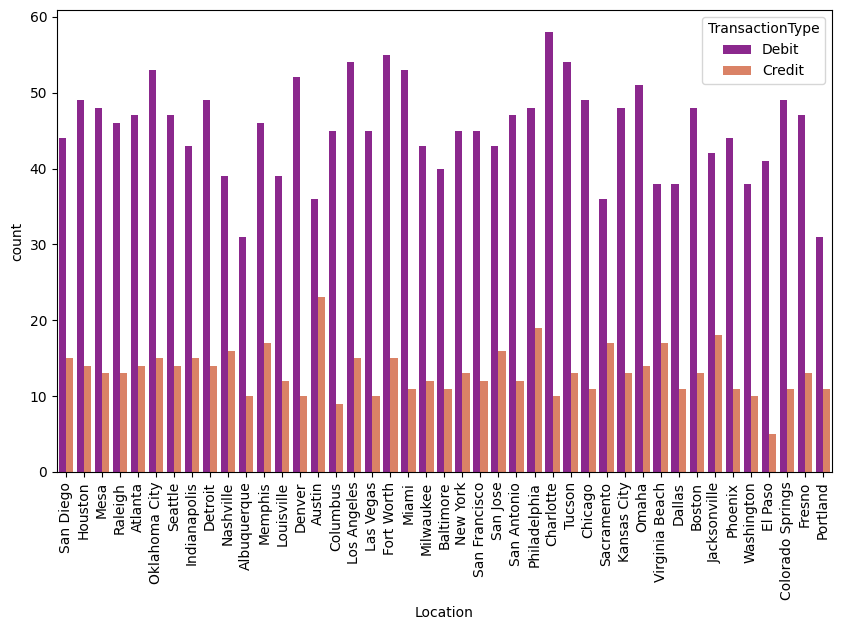

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x ='Location', hue = 'TransactionType', palette='plasma')
plt.xticks(rotation=90)

In [ ]:
df.groupby('TransactionDate').agg({'TransactionAmount':'sum'}).reset_index().sort_values('TransactionAmount', ascending=False).head(10)

,TransactionDate,TransactionAmount
1195,2023-06-27 17:48:25,1919.11
1738,2023-09-15 17:31:42,1831.02
427,2023-03-01 16:31:58,1830.00
1879,2023-10-06 16:05:34,1762.28
1813,2023-09-25 17:11:19,1664.33
2466,2023-12-25 17:41:30,1647.74
1358,2023-07-24 17:46:13,1612.37
1681,2023-09-07 16:27:03,1607.55
2016,2023-10-23 18:00:29,1531.31
1462,2023-08-08 17:15:50,1512.99


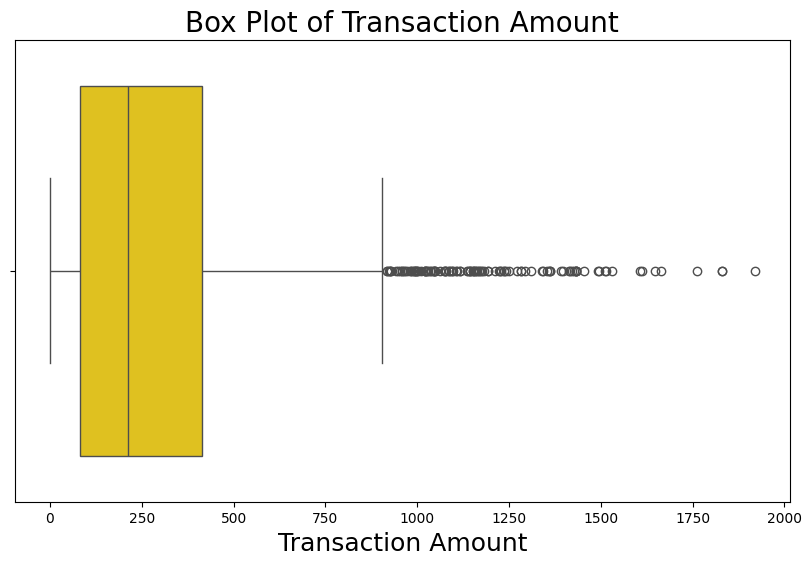

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['TransactionAmount'], color='gold')

plt.title('Box Plot of Transaction Amount', fontsize=20)
plt.xlabel('Transaction Amount', fontsize=18)

plt.show()

In [ ]:
debit_counts = df[df['TransactionType']=='Debit']['TransactionType'].count()
credit_counts = df[df['TransactionType']=='Credit']['TransactionType'].count()

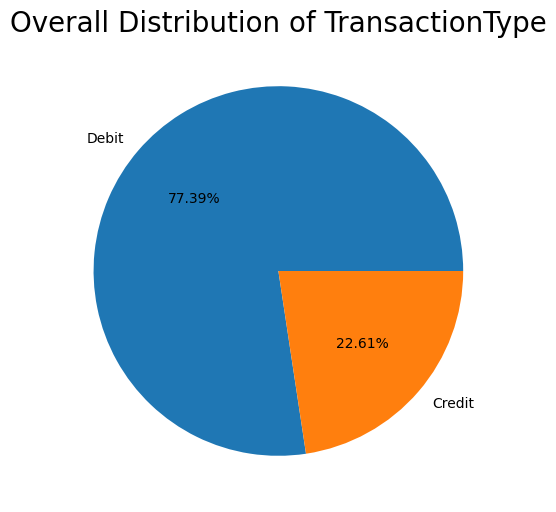

In [ ]:
plt.figure(figsize=(10,6))
index_values = [debit_counts, credit_counts]
index_labels = ['Debit', 'Credit']

plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')

plt.title('Overall Distribution of TransactionType', fontsize=20)

plt.show()

In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_features

['TransactionAmount',
 'CustomerAge',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

In [ ]:
num_df = df[numerical_features]

<Axes: >

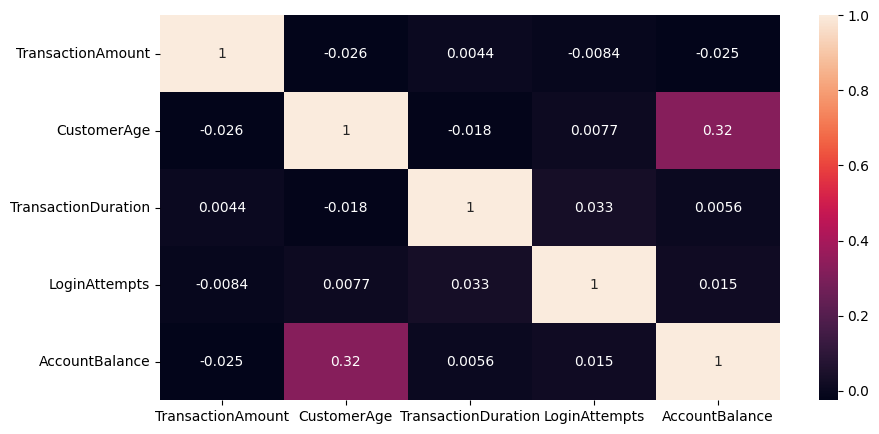

In [ ]:
correlation = num_df.corr()
correlation

plt.figure(figsize=[10,5])
sns.heatmap(correlation, annot = True)

In [ ]:
df.groupby('Channel').agg({'TransactionAmount':'sum'}).reset_index().sort_values('TransactionAmount', ascending=False)

,Channel,TransactionAmount
0,ATM,256331.43
1,Branch,250183.00
2,Online,241041.14


array([[<Axes: title={'center': 'TransactionAmount'}>]], dtype=object)

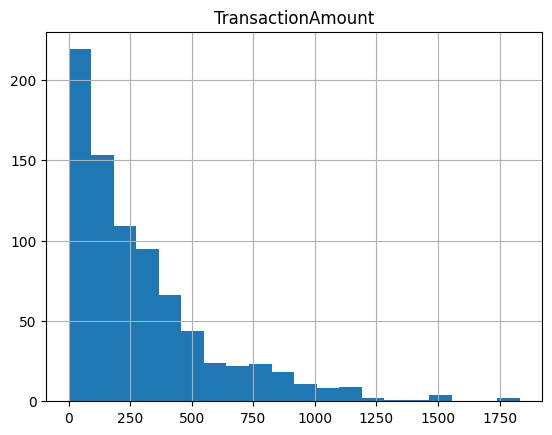

In [ ]:
df[df['Channel'] == 'Online'].hist(column='TransactionAmount', bins=20)

array([[<Axes: title={'center': 'TransactionAmount'}>]], dtype=object)

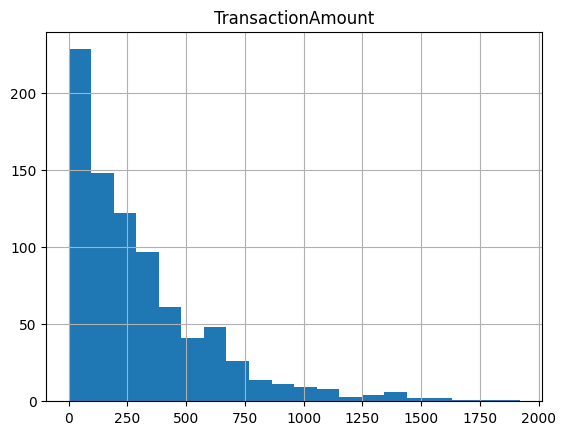

In [ ]:
df[df['Channel'] == 'ATM'].hist(column='TransactionAmount', bins=20)

In [ ]:
df.groupby('CustomerOccupation').agg({'TransactionAmount':'sum'}).reset_index().sort_values('TransactionAmount', ascending=False)

,CustomerOccupation,TransactionAmount
3,Student,205786.03
0,Doctor,184693.81
1,Engineer,180650.06
2,Retired,176425.67


In [ ]:
df[df['TransactionAmount'] > 1000]['CustomerOccupation'].value_counts()

,count
CustomerOccupation,
Student,30
Retired,21
Doctor,20
Engineer,19


In [ ]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['TransactionDay'] = df['TransactionDate'].dt.date

In [ ]:
daily_counts = df.groupby('TransactionDay').size() #count gives count of each column in the dataframe
print(daily_counts)

TransactionDay
2023-01-02    19
2023-01-03     9
2023-01-04     4
2023-01-05     8
2023-01-06     7
              ..
2023-12-26     5
2023-12-27     4
2023-12-28     7
2023-12-29     9
2024-01-01    13
Length: 261, dtype: int64


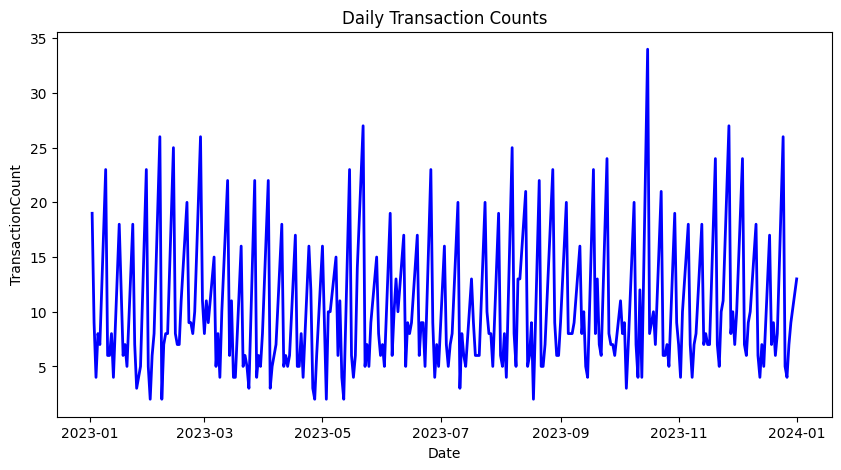

In [ ]:
plt.figure(figsize=(10,5))
daily_counts.plot(title='Daily Transaction Counts', color='blue', linewidth=2)
plt.xlabel('Date')
plt.ylabel('TransactionCount')
plt.show()

In [ ]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['DayOfWeek'] = df['TransactionDate'].dt.day_name()
print(df['DayOfWeek'])

0         Tuesday
1         Tuesday
2          Monday
3          Friday
4          Monday
          ...    
2507    Wednesday
2508    Wednesday
2509       Monday
2510       Friday
2511      Tuesday
Name: DayOfWeek, Length: 2512, dtype: object


<Axes: xlabel='DayOfWeek', ylabel='count'>

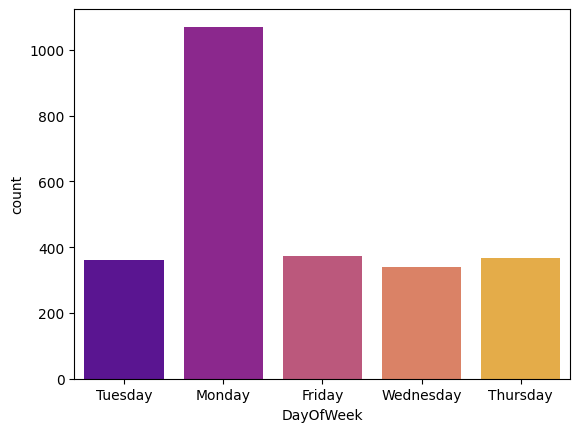

In [ ]:
sns.countplot(data=df, x='DayOfWeek', palette='plasma')

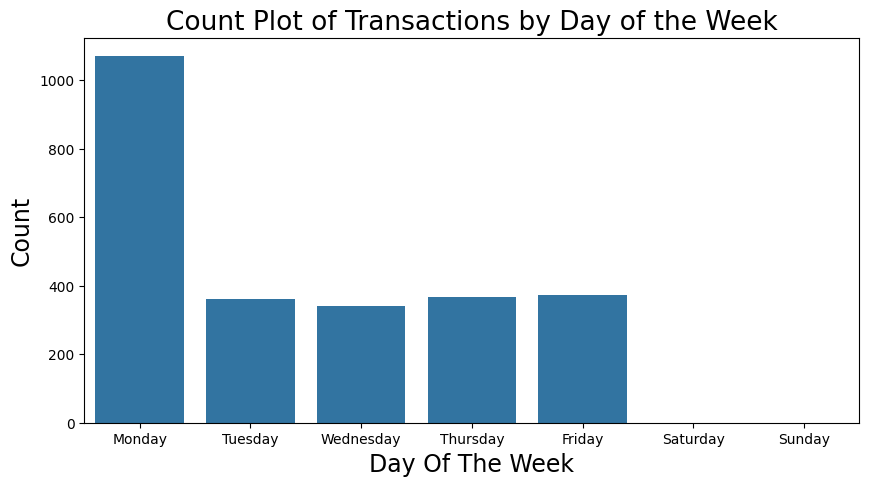

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Count Plot of Transactions by Day of the Week', fontsize=19)
plt.xlabel('Day Of The Week', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.show()

In [ ]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = df.groupby('AccountID')['TransactionDate'].shift(1)
df['DaysSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.days

dtype('O')

In [ ]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

In [ ]:
df['DaysSinceLastTransaction'] = (df['PreviousTransactionDate'] - df['TransactionDate']).dt.days
df['DaysSinceLastTransaction']

,DaysSinceLastTransaction
0,572
1,495
2,482
3,548
4,384
...,...
2507,557
2508,592
2509,440
2510,618


In [ ]:
df[['TransactionDate', 'PreviousTransactionDate']]

,TransactionDate,PreviousTransactionDate
0,2023-04-11 16:29:14,2024-11-04 08:08:08
1,2023-06-27 16:44:19,2024-11-04 08:09:35
2,2023-07-10 18:16:08,2024-11-04 08:07:04
3,2023-05-05 16:32:11,2024-11-04 08:09:06
4,2023-10-16 17:51:24,2024-11-04 08:06:39
...,...,...
2507,2023-04-26 17:09:36,2024-11-04 08:11:29
2508,2023-03-22 17:36:48,2024-11-04 08:11:42
2509,2023-08-21 17:08:50,2024-11-04 08:08:39
2510,2023-02-24 16:24:46,2024-11-04 08:12:22


In [ ]:
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['TransactionDay'] = df['TransactionDate'].dt.dayofweek

In [ ]:

if (df['AccountBalance'] < 0).any():
  print('\nTransactions with negative account balance found.')
else:
  print('\nNo transactions with negative account balance found.')


No transactions with negative account balance found.


In [ ]:
for i , col ,

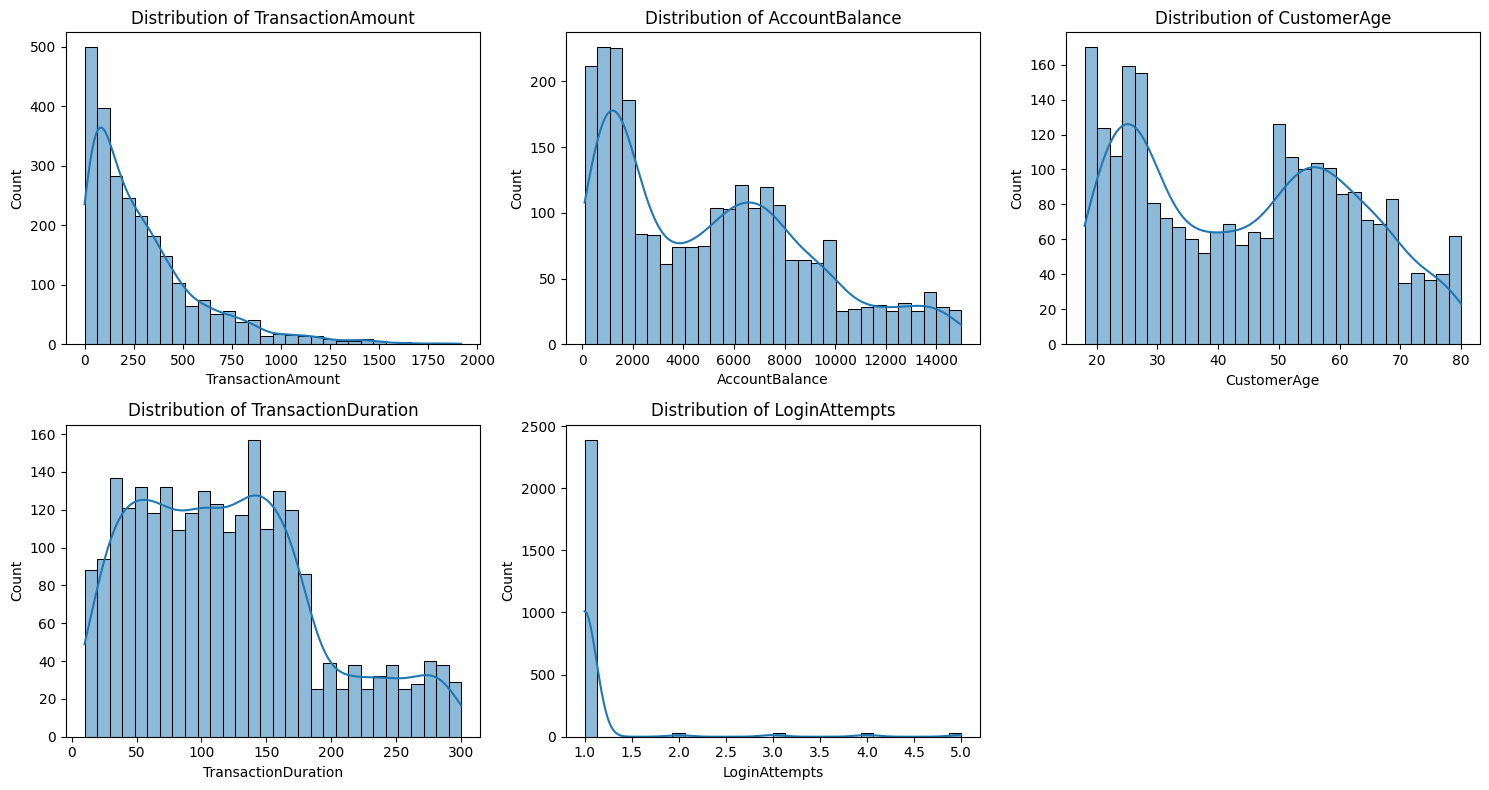

In [ ]:
numerical_cols = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']
plt.figure(figsize=(15,8))
for i, col in enumerate(numerical_cols):
  plt.subplot(2,3,i+1)
  sns.histplot(df[col], kde=True, bins = 30)
  plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

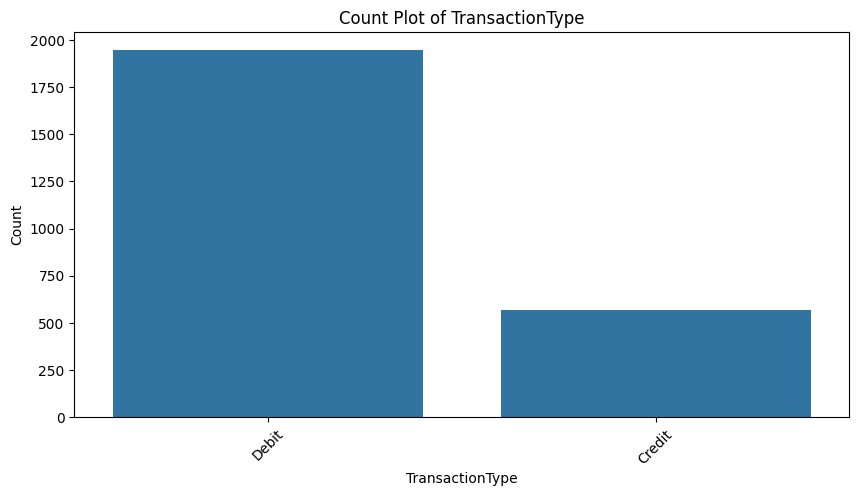

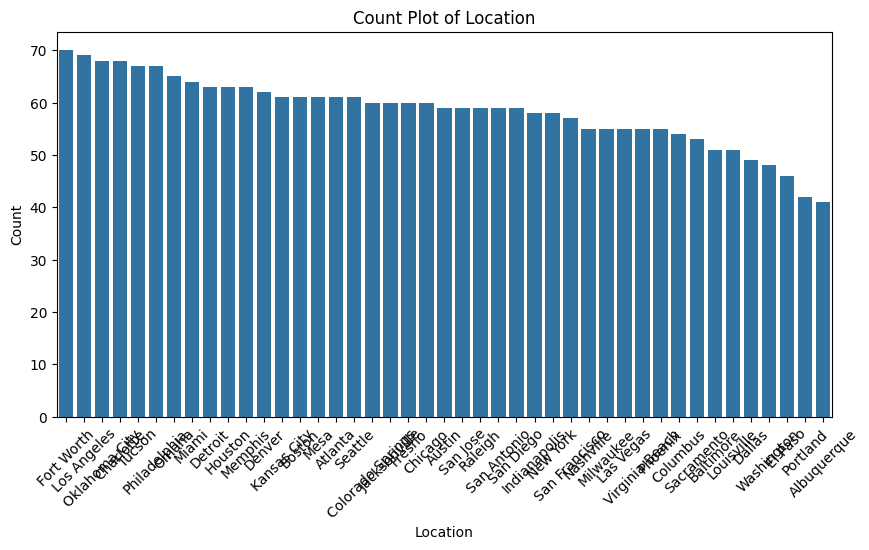

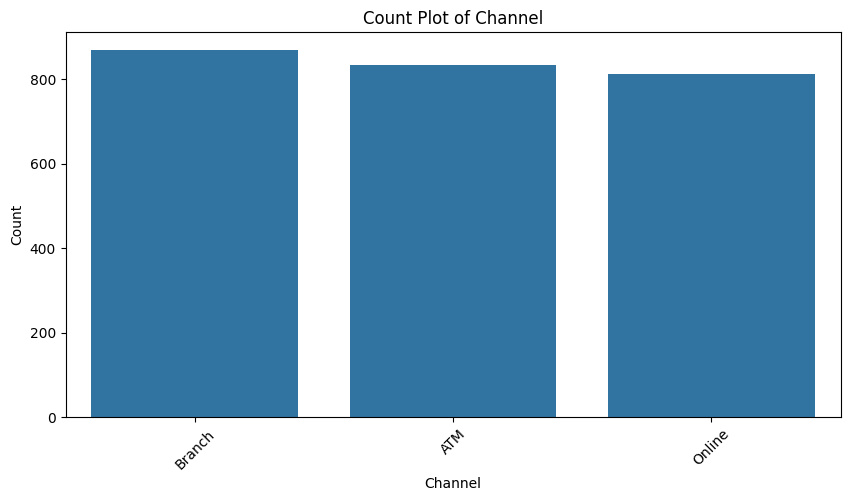

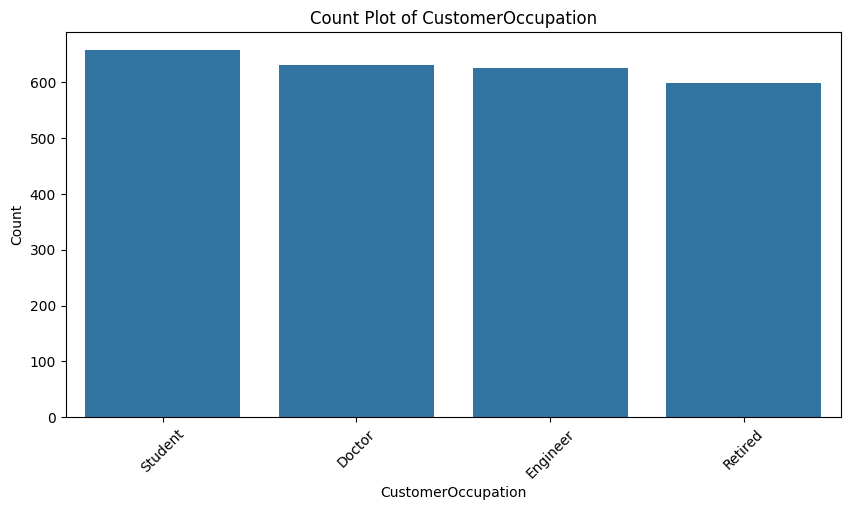

In [ ]:
#categorical Variables Analysis
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


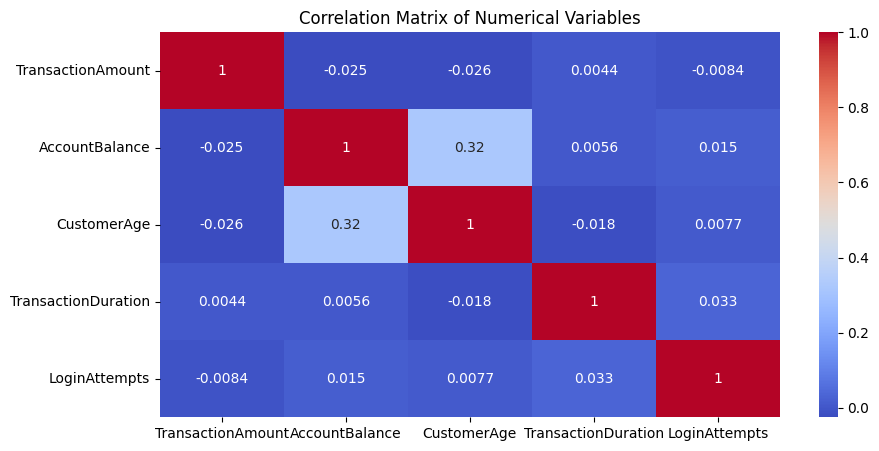

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 5))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

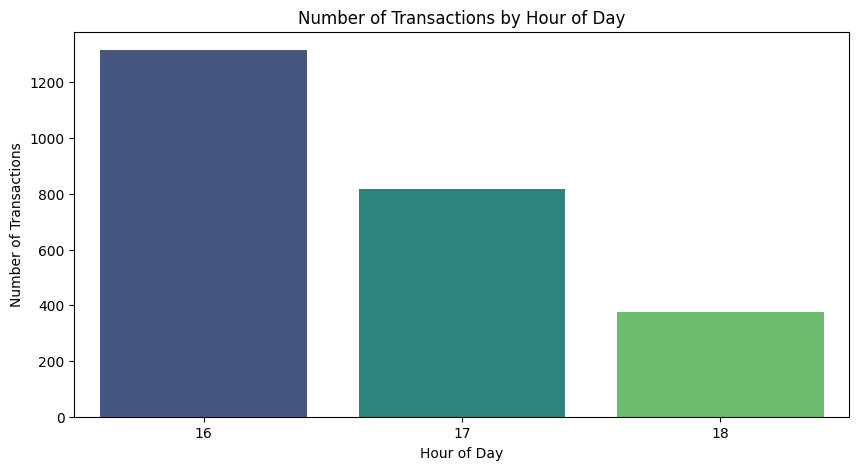

In [ ]:
# Number of Transactions by Hour of Day
plt.figure(figsize=(10, 5))
sns.countplot(x='TransactionHour', data=df, palette='viridis')
plt.title('Number of Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()

In [ ]:
## LoginAttempts: Number of login attempts before the transaction, with higher values indicating potential anomalies.

<Axes: xlabel='LoginAttempts', ylabel='count'>

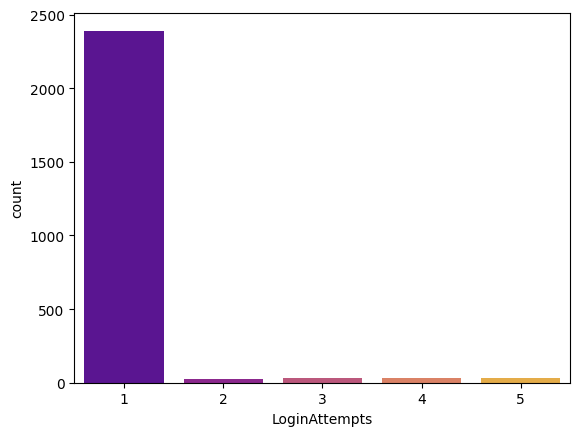

In [ ]:
sns.countplot(data = df, x= 'LoginAttempts', palette='plasma')

In [ ]:
df[(df['TransactionAmount'] > 1500) & (df['LoginAttempts'] > 2)]

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,DaysSinceLastTransaction,TransactionHour,TransactionDay
898,TX000899,AC00083,1531.31,2023-10-23 18:00:29,Debit,San Diego,D000319,91.204.200.167,M078,Online,18,Student,62,4,859.86,2024-11-04 08:06:40,377,18,0


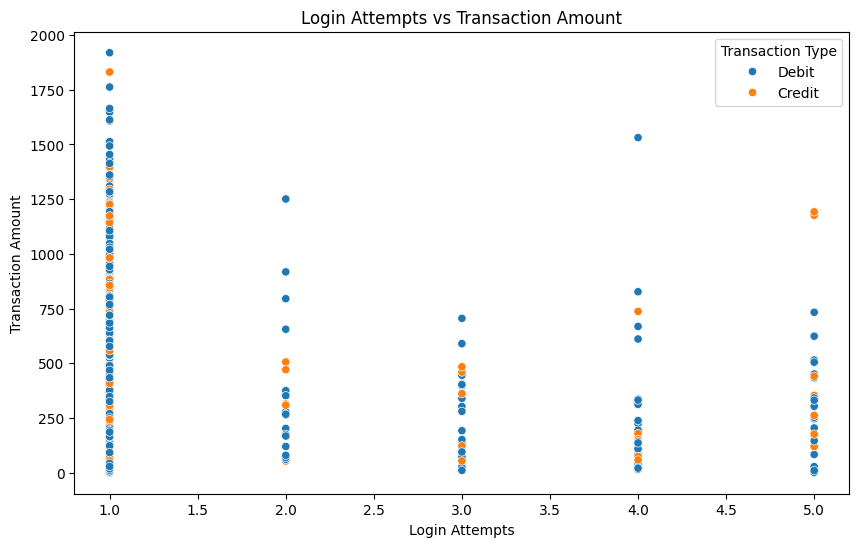

In [ ]:
# Login Attempts vs Transaction Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LoginAttempts', y='TransactionAmount', hue='TransactionType', data=df)
plt.title('Login Attempts vs Transaction Amount')
plt.xlabel('Login Attempts')
plt.ylabel('Transaction Amount')
plt.legend(title='Transaction Type')
plt.show()


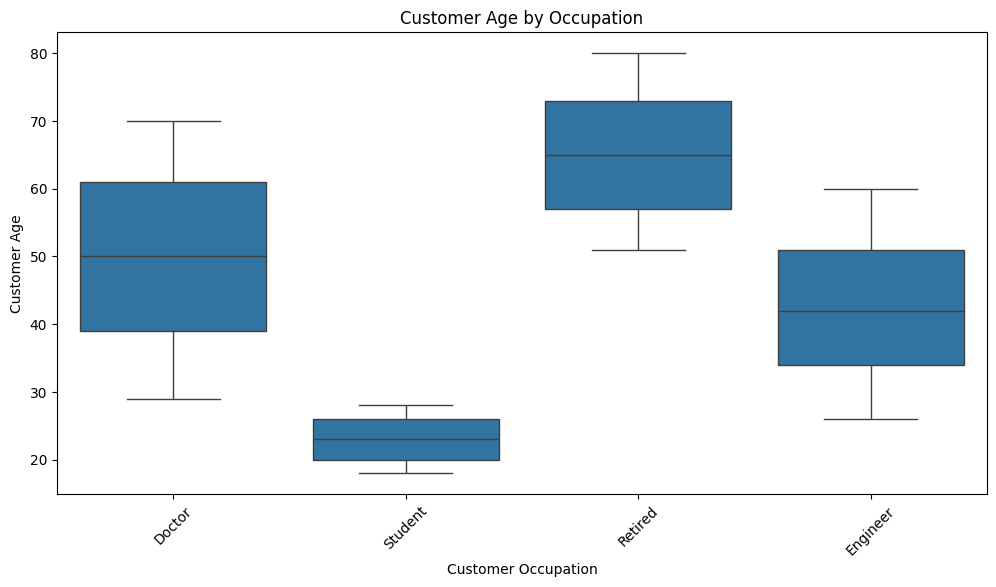

In [ ]:
# Customer Age Distribution by Occupation
plt.figure(figsize=(12, 6))
sns.boxplot(x='CustomerOccupation', y='CustomerAge', data=df)
plt.title('Customer Age by Occupation')
plt.xlabel('Customer Occupation')
plt.ylabel('Customer Age')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Channel', ylabel='TransactionAmount'>

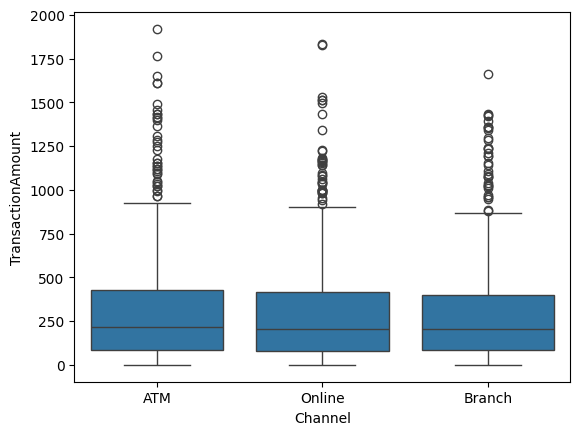

In [ ]:
sns.boxplot(data = df, x = 'Channel', y = 'TransactionAmount')

<Axes: xlabel='CustomerOccupation', ylabel='TransactionAmount'>

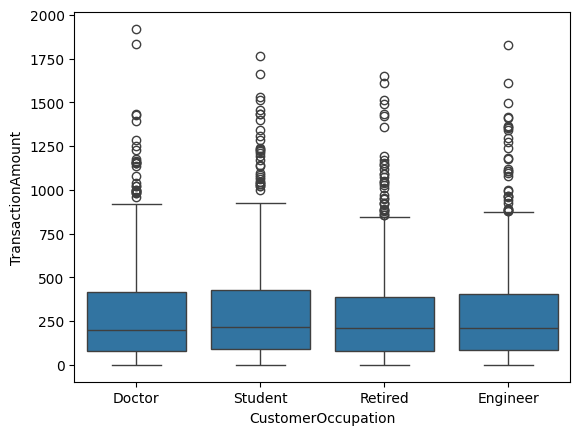

In [ ]:
sns.boxplot(data = df, x= 'CustomerOccupation', y = 'TransactionAmount')

# Feature Engineering

In [ ]:
label_encoder = LabelEncoder()
df['TransactionType_Enc'] = label_encoder.fit_transform(df['TransactionType'])
df['Channel_Enc'] = label_encoder.fit_transform(df['Channel'])
df['CustomerOccupation_Enc'] = label_encoder.fit_transform(df['CustomerOccupation'])

In [ ]:
# Calculating Time Since Last Transaction
df['TimeSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds()
df['TimeSinceLastTransaction'] = df['TimeSinceLastTransaction'].fillna(df['TimeSinceLastTransaction'].median())

In [ ]:
# Creating Transaction Frequency Feature
transaction_counts = df.groupby('AccountID').size().reset_index(name='TransactionCount')
df = pd.merge(df, transaction_counts, on='AccountID', how='left')

In [ ]:
# Dropping unnecessary columns for modeling
df_model = df.drop(['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID',
                    'IP Address', 'MerchantID', 'Channel', 'PreviousTransactionDate', 'CustomerOccupation'], axis=1)

In [ ]:
df_model.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceLastTransaction,TransactionHour,TransactionDay,TransactionType_Enc,Channel_Enc,CustomerOccupation_Enc,TimeSinceLastTransaction,TransactionCount
0,14.09,70,81,1,5112.21,572,16,1,1,0,0,-49477134.0,7
1,376.24,68,141,1,13758.91,495,16,1,1,0,0,-42823516.0,7
2,126.29,19,56,1,1122.35,482,18,0,1,2,3,-41694656.0,4
3,184.50,26,25,1,8569.06,548,16,4,1,2,3,-47403415.0,8
4,13.45,26,198,1,7429.40,384,17,0,0,2,3,-33228915.0,6


In [ ]:
df_model.shape

(2512, 13)

## Anomaly Detection using Isolation Forest

In [ ]:
# Preparing data for anomaly detection
features = df_model.columns.drop(['Anomaly']) if 'Anomaly' in df_model.columns else df_model.columns
X = df_model[features]


In [ ]:
X.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,DaysSinceLastTransaction,TransactionHour,TransactionDay,TransactionType_Enc,Channel_Enc,CustomerOccupation_Enc,TimeSinceLastTransaction,TransactionCount
0,14.09,70,81,1,5112.21,572,16,1,1,0,0,-49477134.0,7
1,376.24,68,141,1,13758.91,495,16,1,1,0,0,-42823516.0,7
2,126.29,19,56,1,1122.35,482,18,0,1,2,3,-41694656.0,4
3,184.50,26,25,1,8569.06,548,16,4,1,2,3,-47403415.0,8
4,13.45,26,198,1,7429.40,384,17,0,0,2,3,-33228915.0,6


In [ ]:
# Initializing and fitting the Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
isolation_forest.fit(X)

IsolationForest(contamination=0.05, random_state=42)

Number of anomalies detected: 126


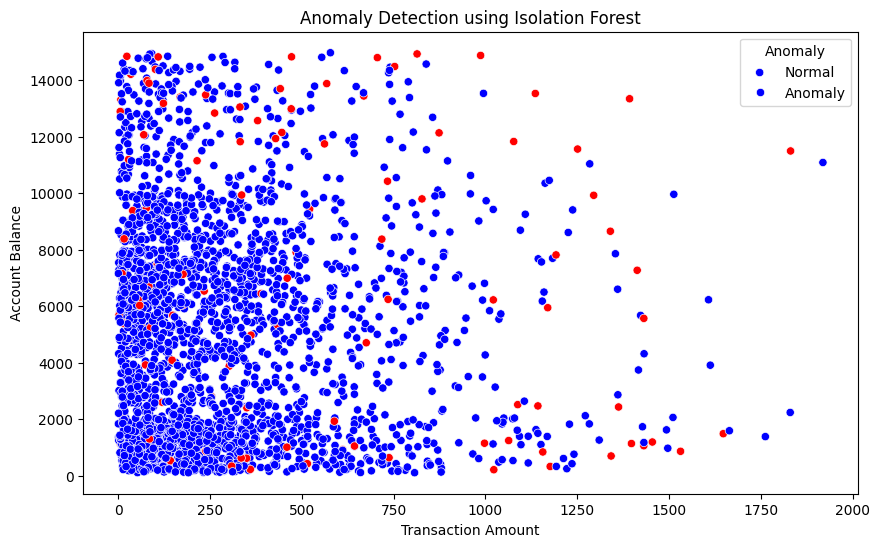

In [ ]:
# Predicting anomalies
df['Anomaly'] = isolation_forest.predict(X)
df['Anomaly'] = df['Anomaly'].map({1: 0, -1: 1})

# Number of anomalies detected
print(f"Number of anomalies detected: {df['Anomaly'].sum()}")

# Visualizing anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TransactionAmount', y='AccountBalance', hue='Anomaly', palette={0: 'blue', 1: 'red'})
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       478
           1       0.77      0.40      0.53        25

    accuracy                           0.96       503
   macro avg       0.87      0.70      0.75       503
weighted avg       0.96      0.96      0.96       503



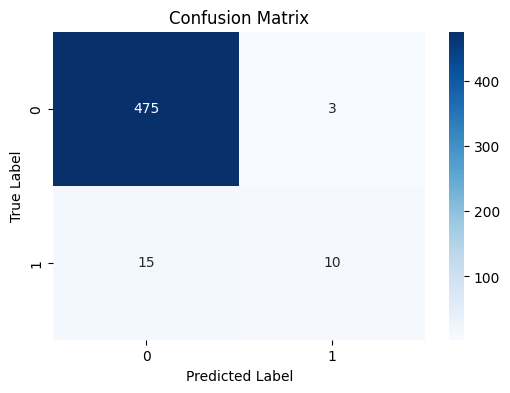

In [ ]:
# Using anomalies detected by Isolation Forest as labels
X = df_model[features]
y = df['Anomaly']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Training a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Hyperparameter tuning using GridSearchCV (optional)
from sklearn.model_selection import GridSearchCV

# Defining parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt']
}

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fitting the model
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Evaluating the best estimator
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Classification Report with Best Estimator:")
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Classification Report with Best Estimator:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       478
           1       0.75      0.36      0.49        25

    accuracy                           0.96       503
   macro avg       0.86      0.68      0.73       503
weighted avg       0.96      0.96      0.96       503

